## Text Corpus Structure
โครงสร้าง corpus มีทั้งสี่แบบ ได้แก่
- isolated (แยกเอกเทศ)
- categorized (แบ่งเป็นหมวดหมู่ ชัดเจน)
- overlapping (ระบบแท็กนั่นแหละ หนึ่งเรื่องอาจมีหลายแท็ก)
- temporal (ระบุเป็นช่วงเวลา)

## Conditional Frequency Distributions  (ConditionalFreqDist)
ทำการนำค่าข้าเป็น list ของ tuple ตัวอย่างเช่น pairs = [(หมวด,คำ),(หมวด,คำ)]

In [11]:
## ตัวอย่างการใช้
import nltk
from nltk.corpus import *
from nltk import ConditionalFreqDist
pairs = [(genre,word.lower()) for genre in ['news','romance'] for word in brown.words(categories=genre)]
cFreq = ConditionalFreqDist(pairs)
print(cFreq)

<ConditionalFreqDist with 2 conditions>


In [13]:
## ตัวอย่างเข้าถึงข้อมูลความที่
print(cFreq['news']['the']) # จำนวนคำว่า the ในหมวด news

6386


In [14]:
print(cFreq['news']) #แสดง จำนวน wordtype กับ จำนวน token ในประเภท news

<FreqDist with 13112 samples and 100554 outcomes>


In [17]:
## นับทุกหมวดและนับทกคำในหมวด
cfd = ConditionalFreqDist([(genre,word) for genre in brown.categories() for word in brown.words(categories = genre)])

In [18]:
## แสดงหมวดทั้งหมดที่มีใน conditionalFreqDist
print(cfd.conditions())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [19]:
## อยากได้ตารางแสดงความที่ของคำที่สนใจและหมวดที่สนใจ
genres = ['news','religion','hobbies','science_fiction','romance','humor'] #หมวดที่สนใจ
words = ['can','could','may','might','must','will'] #คำที่สนใจ
cfd.tabulate(conditions=genres,samples = words)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


In [22]:
## ลองใช้คำปราศัยหน่อย
from nltk.corpus import inaugural
print(inaugural.fileids())

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

In [28]:
## Quest ทำ conditionalFrequncyDisttribution เพื่อนับความที่แต่ละคำในไฟล์
cFreq = ConditionalFreqDist([(fileName[:4],word.lower()) for fileName in inaugural.fileids() for word in inaugural.words(fileids = fileName)])
print([year for year in cFreq.conditions()]) ## พิมพ์ชื่อไฟล์ทั้งหมด

['1789', '1793', '1797', '1801', '1805', '1809', '1813', '1817', '1821', '1825', '1829', '1833', '1837', '1841', '1845', '1849', '1853', '1857', '1861', '1865', '1869', '1873', '1877', '1881', '1885', '1889', '1893', '1897', '1901', '1905', '1909', '1913', '1917', '1921', '1925', '1929', '1933', '1937', '1941', '1945', '1949', '1953', '1957', '1961', '1965', '1969', '1973', '1977', '1981', '1985', '1989', '1993', '1997', '2001', '2005', '2009']


In [32]:
cFreq.tabulate(samples = ["america","citizens","democracy"])

       america  citizens democracy 
1789         0         5         0 
1793         1         1         0 
1797         5         5         0 
1801         0         7         0 
1805         0        10         0 
1809         0         1         0 
1813         0         4         0 
1817         0         9         0 
1821         2        15         0 
1825         0         2         1 
1829         0         2         0 
1833         0         3         0 
1837         1         6         0 
1841         0        27         4 
1845         0        11         0 
1849         0         2         0 
1853         0         2         0 
1857         1         7         0 
1861         0         6         0 
1865         0         0         0 
1869         0         2         0 
1873         0         1         0 
1877         0         7         0 
1881         1         5         0 
1885         0         6         0 
1889         0         4         0 
1893         0         4    

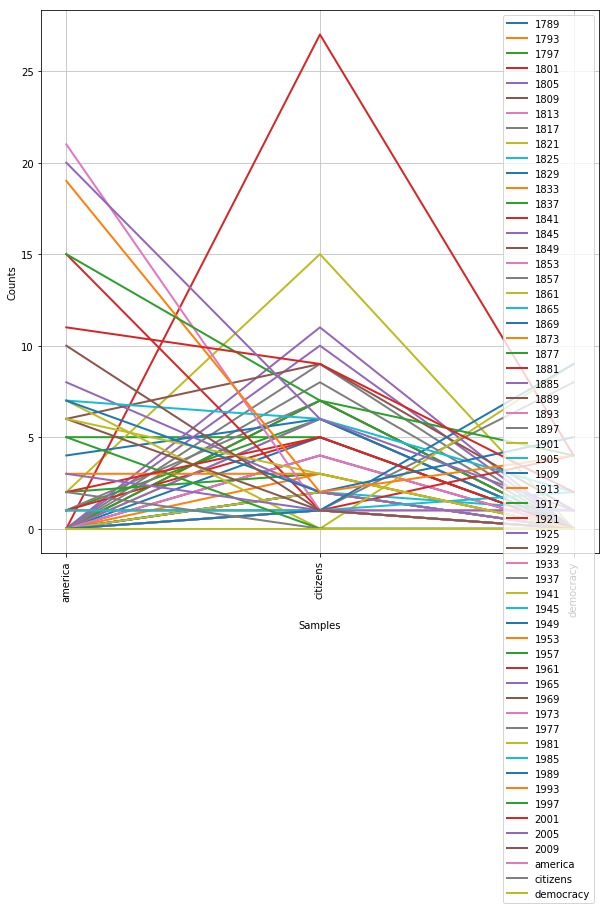

In [50]:
#พล็อตแบบไม่เวิ์ค
cFreq.plot(samples = ["america","citizens","democracy"])

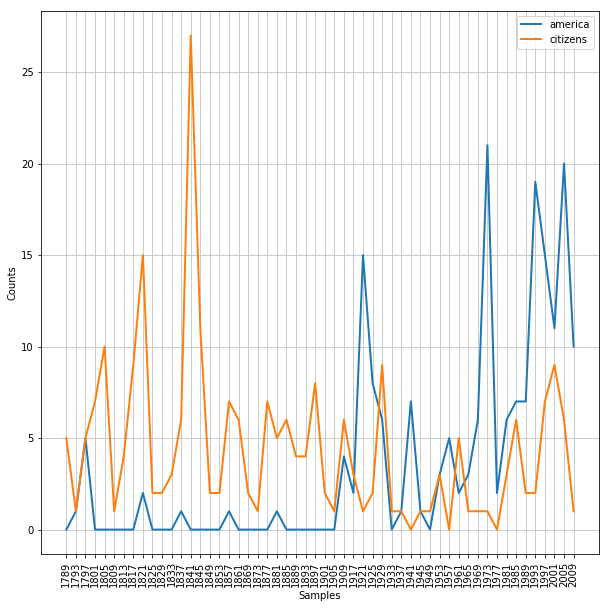

In [54]:
# มาลองพล็อตกราฟ คำต่อปีหน่อย
from matplotlib.pylab import *
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams.update({'font.size': 10})
cndList = [(word.lower(),fileName[:4]) for fileName in inaugural.fileids() for word in inaugural.words(fileids = fileName)]
ConditionalFreqDist(cndList).plot(conditions = ["america","citizens"])

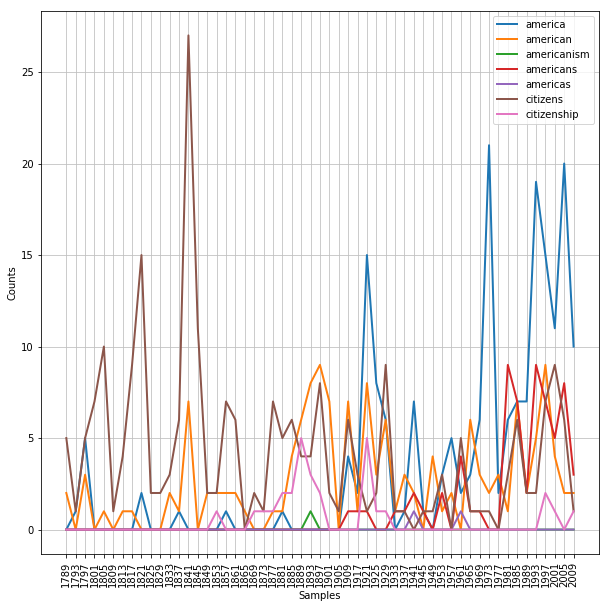

In [58]:
#แล้วคำว่า american , citizen (มี subfix) ล่ะ?
# มาลองพล็อตกราฟ คำต่อปีหน่อย
cndList = [(word.lower(),fileName[:4]) \
           for fileName in inaugural.fileids()\
           for word in inaugural.words(fileids = fileName)\
           for sample in ["america","citizens"]\
           if word.lower().startswith(sample)]
ConditionalFreqDist(cndList).plot()

## การบ้าน
ให้ลองใช้ corpus ชื่อ Reuters แล้วดูว่ามี method ตัวไหนไม่เหมือนชาวบ้านบ้าง (เพราะ Reuters เป็ยแบบ overlapping) 

## เราสามารถสร้าง corpus เองได้
```python
from nltk.corpus import PlaintextCorpusReader
corpus_root = 'path ของ folder'
wordlists = PlaintextCorpusReader(corpus_root,'.*') # .* คือทุกไฟล์
wordlists.fileids() #อันนี้อ่านไฟล์ทั้งหมดที่มี
```

In [65]:
#generate random text with bigram [นี่มันระบบแต่งนิยายอัตโนมัติ]
def generate_model(cfdist,word,num=15):
    for i in range(num):
        print(word)
        word =  cfdist[word].max()
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)
print(cfd['living'])
generate_model(cfd,'living')

<FreqDist with 6 samples and 16 outcomes>
living
creature
that
he
said
,
and
the
land
of
the
land
of
the
land


## Lexical Resource (คลังคำ)
ตัวอย่างเช่นเก็บคำพร้อมกับความที่ของคำ `vocab = sorted(set(my_text))`

นิยมเก็บแบบพจนานกรมนั่นล่ะ

คำ [part of speech], ความหมาย << นี่เรียก lexical entry 

คำ -> มักเรียกว่า Headword หรือ lemma

In [67]:
#คลังคำที่มักใช้บ่อย nltk.corpus.words (นิยมเรียกว่า wordlist corpus) เก็บศัพท์ที่พบบ่อยๆ
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab.difference(english_vocab)
    return sorted(unusual)

In [68]:
unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))

['abbeyland',
 'abhorred',
 'abilities',
 'abounded',
 'abridgement',
 'abused',
 'abuses',
 'accents',
 'accepting',
 'accommodations',
 'accompanied',
 'accounted',
 'accounts',
 'accustomary',
 'aches',
 'acknowledging',
 'acknowledgment',
 'acknowledgments',
 'acquaintances',
 'acquiesced',
 'acquitted',
 'acquitting',
 'acted',
 'actions',
 'adapted',
 'adding',
 'additions',
 'addressed',
 'addresses',
 'addressing',
 'adhering',
 'adieus',
 'adjusting',
 'administering',
 'admirers',
 'admires',
 'admitting',
 'adorned',
 'advances',
 'advantages',
 'affairs',
 'affections',
 'affects',
 'affixed',
 'afflictions',
 'afforded',
 'affording',
 'ages',
 'agitated',
 'agonies',
 'ailments',
 'aimed',
 'alarms',
 'alienated',
 'alighted',
 'alleged',
 'allenham',
 'allowances',
 'allowed',
 'allowing',
 'alluded',
 'alterations',
 'altered',
 'altering',
 'amended',
 'amounted',
 'amusements',
 'ankles',
 'annamaria',
 'annexed',
 'announced',
 'announcing',
 'annuities',
 'annum',
 

## Stopword คืออะไร?
คำที่มีความถี่สูง แต่ไม่มีผลกับการค้นหา แนะนำให้ตัดออก

In [70]:
from nltk.corpus import stopwords
len(stopwords.words('english'))

179

In [71]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## การบ้าน
ไปลองเอง cmudict (คลังข้อความ)

In [72]:
cmudict

<CMUDictCorpusReader in 'C:\\Users\\pakkapon\\AppData\\Roaming\\nltk_data\\corpora\\cmudict'>

## การบ้าน
- ให้นับคำภาษาอังกฤษ 1  คำมีกี่พยาง (นับพยางที่มีเลขห้อยท้ายใน CMUdict)
- ช่วยหาสูตร Level Reading IS ของคำว่าเหมาะสำหรับด็กวัยไหนในการอ่าน (ไปหาสมการมา วิธีคำนวณหาค่าใช้ CMU dict)
- ข้อที่เหลือทั้งหมด